# 그래프 여러개 그리기

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 화면에 그래프 그리기
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=14)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (10,6)

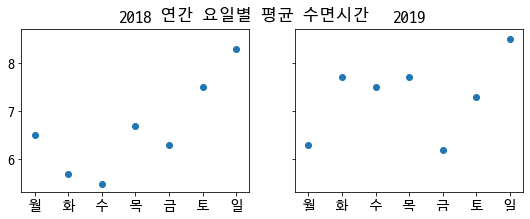

In [4]:
# 12-10
x=['월','화','수','목','금','토','일']
y1=[6.5,5.7,5.5,6.7,6.3,7.5,8.3]
y2=[6.3,7.7,7.5,7.7,6.2,7.3,8.5]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9,3), sharex=True, sharey=True)

ax=axs[0]
ax.scatter(x,y1)
ax.set_title('2018')

ax=axs[1]
ax.scatter(x,y2)
ax.set_title('2019')

fig.suptitle('연간 요일별 평균 수면시간')

plt.show()

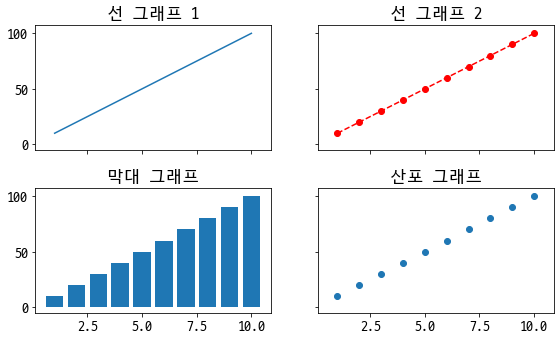

In [13]:
# 12-11

x=list(range(1,11))
y=list(range(10,101,10))

fig,axs=plt.subplots(2, 2, figsize=(9,5), sharex=True, sharey=True)

ax = axs[0][0]
ax.plot(x,y)
ax.set_title('선 그래프 1')

ax= axs[0][1]
ax.plot(x,y, color='red', linestyle='--', marker='o')
ax.set_title('선 그래프 2')

ax=axs[1][0]
ax.bar(x,y)
ax.set_title('막대 그래프')

ax=axs[1][1]
ax.scatter(x,y)
ax.set_title('산포 그래프')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)

plt.show()

# ansocombe's Quartet

In [1]:
import seaborn as sns
ans = sns.load_dataset('anscombe')

In [2]:
ans.shape

(44, 3)

In [3]:
ans.head()   # 위에서 5가지

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [5]:
ans.tail()  # 밑에서 5가지

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [6]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [8]:
ds1 = ans[ans['dataset'] =='I']
ds2 = ans[ans['dataset'] =='II']
ds3 = ans[ans['dataset'] =='III']
ds4 = ans[ans['dataset'] =='IV']

In [9]:
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


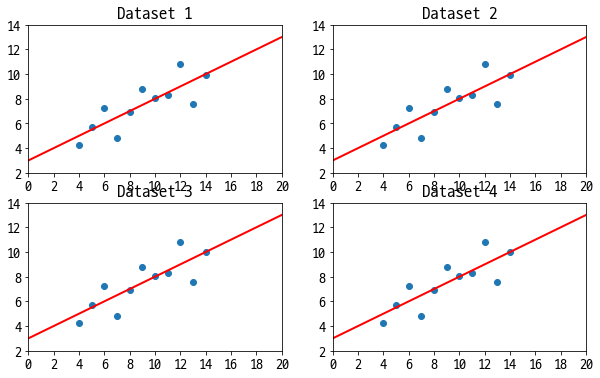

In [18]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(ds1['x'], ds1['y'], 'o')
axes2.plot(ds1['x'], ds1['y'], 'o')
axes3.plot(ds1['x'], ds1['y'], 'o')
axes4.plot(ds1['x'], ds1['y'], 'o')

axes1.plot([0,20],[3,13], 'r-', lw=2)
axes2.plot([0,20],[3,13], 'r-', lw=2)
axes3.plot([0,20],[3,13], 'r-', lw=2)
axes4.plot([0,20],[3,13], 'r-', lw=2)

axes1.set(xlim=(0,20), ylim=(2,14))
axes2.set(xlim=(0,20), ylim=(2,14))
axes3.set(xlim=(0,20), ylim=(2,14))
axes4.set(xlim=(0,20), ylim=(2,14))

axes1.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes2.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes3.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes4.set(xticks=range(0,21,2), yticks=range(2,15,2))

axes1.set_title('Dataset 1')
axes2.set_title('Dataset 2')
axes3.set_title('Dataset 3')
axes4.set_title('Dataset 4')

plt.show()

# Refactoring

In [19]:
ds = []
ds.append(ans[ans['dataset'] == 'I'])
ds.append(ans[ans['dataset'] == 'II'])
ds.append(ans[ans['dataset'] == 'III'])
ds.append(ans[ans['dataset'] == 'IV'])

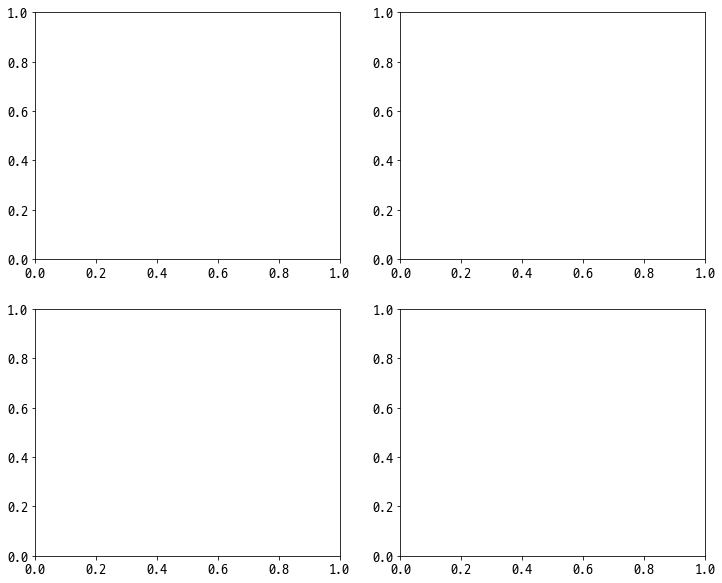

In [20]:
fig, asx = plt.subplots(2,2, figsize = (12,10))
for i in range(4):
    asx[i//2][i%2].plot(ds[i]['x'], ds[i]['y'], 'o')
    asx[i//2][i%2].plot([0,20],[3,13], 'r-', lw=2)
    asx[i//2][i%2].set(xlim=(0,20), ylim=(2,14))
    asx[i//2][i%2].set(xticks=range(0,21,2), yticks=range(2,15,2))
    asx[i//2][i%2].set_title('Dataset'+ str(i+1))
    
fig.suptitle("Anscombo's Quartet")
plt.subplots_adjust

# seaborn

In [21]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

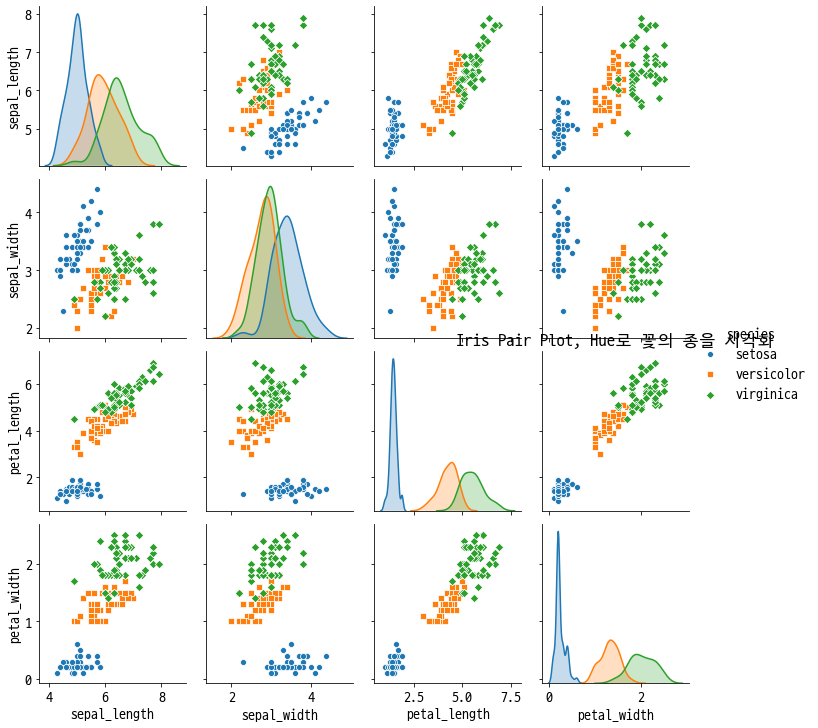

In [23]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()